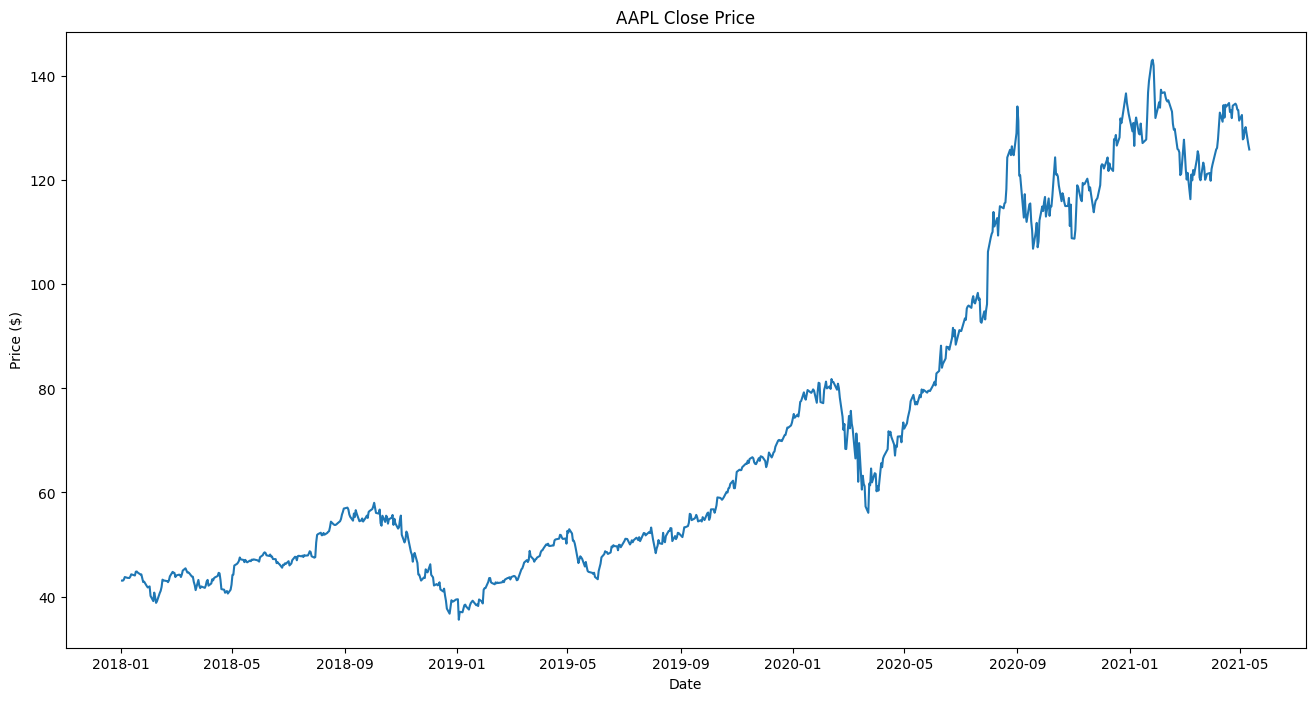

Epoch 1/100
17/17 - 3s - loss: 0.0218 - 3s/epoch - 164ms/step
Epoch 2/100
17/17 - 0s - loss: 0.0048 - 268ms/epoch - 16ms/step
Epoch 3/100
17/17 - 0s - loss: 0.0023 - 271ms/epoch - 16ms/step
Epoch 4/100
17/17 - 0s - loss: 0.0013 - 266ms/epoch - 16ms/step
Epoch 5/100
17/17 - 0s - loss: 0.0012 - 265ms/epoch - 16ms/step
Epoch 6/100
17/17 - 0s - loss: 8.4664e-04 - 255ms/epoch - 15ms/step
Epoch 7/100
17/17 - 0s - loss: 8.8417e-04 - 262ms/epoch - 15ms/step
Epoch 8/100
17/17 - 0s - loss: 6.8935e-04 - 267ms/epoch - 16ms/step
Epoch 9/100
17/17 - 0s - loss: 8.4907e-04 - 247ms/epoch - 15ms/step
Epoch 10/100
17/17 - 0s - loss: 7.5718e-04 - 250ms/epoch - 15ms/step
Epoch 11/100
17/17 - 0s - loss: 6.1919e-04 - 264ms/epoch - 16ms/step
Epoch 12/100
17/17 - 0s - loss: 5.8068e-04 - 267ms/epoch - 16ms/step
Epoch 13/100
17/17 - 0s - loss: 5.7365e-04 - 265ms/epoch - 16ms/step
Epoch 14/100
17/17 - 0s - loss: 6.0102e-04 - 270ms/epoch - 16ms/step
Epoch 15/100
17/17 - 0s - loss: 6.4251e-04 - 271ms/epoch - 16ms/s

ValueError: x and y must have same first dimension, but have shapes (194,) and (254,)

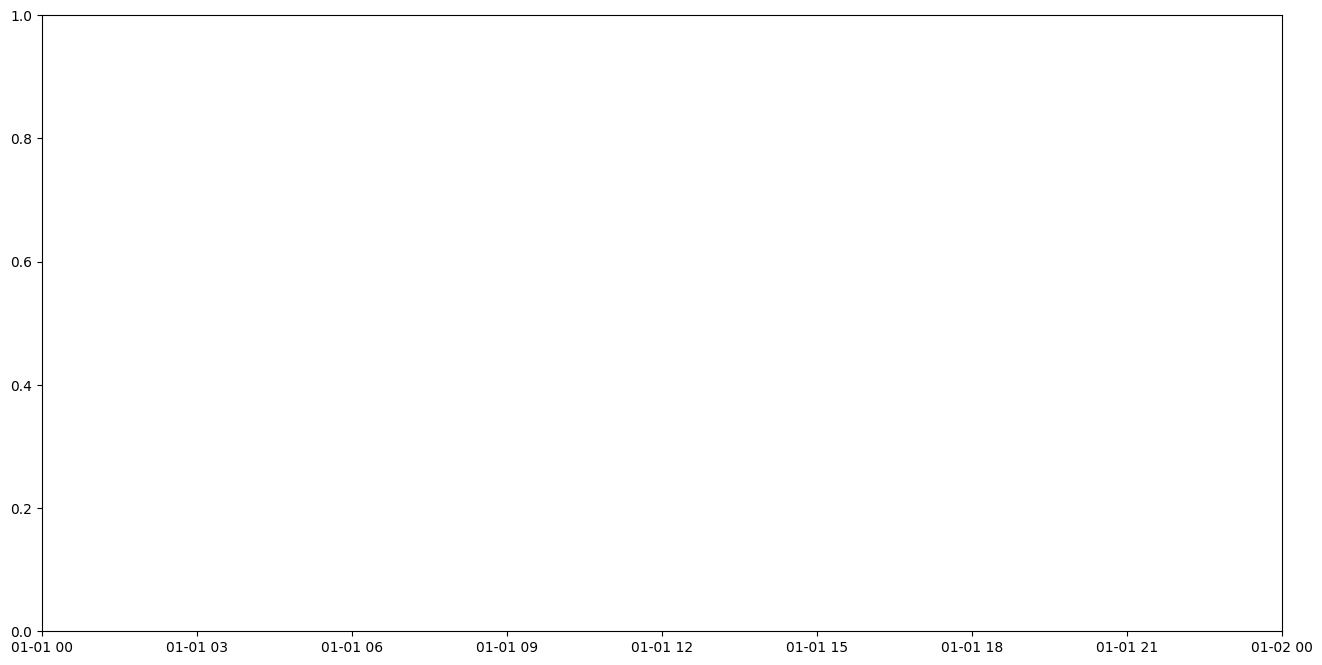

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


df = pd.read_csv(
    "https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1514764800&period2=1620768000&interval=1d&events=history&includeAdjustedClose=true"
)

df = df[["Date", "Close"]]


df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
plt.figure(figsize=(16, 8))
plt.plot(df["Close"])
plt.title("AAPL Close Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df.values)

train_size = int(len(data) * 0.7)
train_data = data[:train_size, :]
test_data = data[train_size:, :]


def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i : i + look_back, 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)


look_back = 60
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))


model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")


model.fit(train_X, train_Y, epochs=100, batch_size=32, verbose=2)


predictions = model.predict(test_X)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(16, 8))
plt.plot(df.index[train_size + look_back :], test_data[:, 0], label="Actual")
plt.plot(df.index[train_size + look_back :], predictions[:, 0], label="Predicted")
plt.title("AAPL Close Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()
